In [1]:
#!/usr/bin/python
"""Set up and run simulations in Dymola, and then plot the results.
"""
__author__ = "Filip Jorissen"
__version__ = "2016-07-20"

import os
import matplotlib.pyplot as plt
import numpy as np
import re

from matplotlib import gridspec
from modelicares import gen_experiments, Experiment, SimResList, write_script, saveall

def merge_gens(gen1, gen2):
    result = []
    for i in gen1:
        result.append(i)
    for i in gen2:
        result.append(i)
    return result

def plott(sim, name, coeffTime=1, coeffVar=1, offsetVar=0, label= '', marker=''):
    var = sim[name]
    time = sim["Time"]
    plt.plot(time.values()[0]*coeffTime,(var.values()[0]+offsetVar)*coeffVar, marker, markersize=8, label = label)

class Result:
    solver=""
    results=0
    x = []
    y = []
    
    def __init__(self, solver):
        self.solver = solver

In [2]:
# Based on code from Kevin Davies - ModelicaRes
# Name of the Modelica script (may include the path)
FNAME = 'run_sims.mos'

# Working directory
WORKING_DIR = '/tmp/rendering/scripts'

# List of Modelica packages that should be preloaded (besides the Modelica
# Standard Library)
# Each may be a *.mo file or a path where a package.mo file resides, e.g.,
# "/opt/dymola/Modelica/Library/VehicleInterfaces 1.1.1".
#PACKAGES = ["/home/filipjorissen/dymola.mos"]

# Using dymola.mos instead of named startup script
PACKAGES = [""]   

FIGPATH="/media/psf/Home/Documents/Software/IDEAS-git/IDEAS/Resources/Images/BESTEST/"

start = 0;
end = 24*3600*365;

values = 5000;


# List or generator of simulations to run
EXPERIMENTS=gen_experiments(models=["IDEAS.Buildings.Validation.BESTEST"],
                             args=dict(stopTime=[end], method=['\"LSodar\"'], numberOfIntervals=[values]))


# Formats in which to save the figures (e.g., ['pdf', 'eps', 'svg', 'png'])
# If the figures shouldn't be saved, specify an empty list.
FORMATS = ['pdf', 'eps']

MODELS, RESULTS_DIR = write_script(EXPERIMENTS, working_dir=WORKING_DIR,
                                       packages=PACKAGES, fname=FNAME)		
                                       
                                    






In [ ]:
# For Linux:
# need to add :
# Evaluate=true;
# Advanced.EfficientMinorEvents=true;
# to run_sims.mos script for getting fast simulation!
os.system('dymola ' + FNAME)

In [41]:
# data from http://simulationresearch.lbl.gov/dirpubs/epl_bestest_ash.pdf

EHeacase600_Min = [4.296, 4.355, 4.613, 5.05, 2.751, 0]
EHeacase600_Max = [5.709, 5.786, 5.944, 6.469, 3.803, 0]
EHeacase600_Avg = [5.046, 5.098364, 5.328, 5.686, 3.135, 0]
EHeacase600_E_plus = [4.673, 4.693, 4.828, 5.112, 3.195, 0]
ECoocase600_Min = [6.137, 3.915, 3.417, 2.129, 5.952, 4.816]
ECoocase600_Max = [8.448, 6.139, 5.482, 3.701, 8.097, 7.064]
ECoocase600_Avg = [7.053, 5.144, 4.416, 2.951, 6.79, 5.708]
ECoocase600_E_plus = [6.792, 4.821, 4.249, 2.875, 6.558, 5.139]
PHeacase600_Min = [3.437, 3.437, 3.591, 3.592, 5.232, 0]
PHeacase600_Max = [4.354, 4.354, 4.379, 4.28, 6.954, 0]
PHeacase600_Avg = [3.952, 3.947, 3.998, 3.949, 5.903, 0]
PHeacase600_E_plus = [3.838, 3.824, 3.835, 3.809, 7.339, 0]
PCoocase600_Min = [5.965, 5.669, 3.634, 3.072, 5.884, 5.831]
PCoocase600_Max = [7.188, 6.673, 5.096, 4.116, 7.126, 7.068]
PCoocase600_Avg = [6.535, 6.09, 4.393, 3.688, 6.478, 6.404]
PCoocase600_E_plus = [6.664, 6.334, 4.352, 3.791, 6.65, 6.563]
EHeacase900_Min = [1.17, 1.512, 3.261, 4.143, 0.793, 2.144, 0]
EHeacase900_Max = [2.041, 2.282, 4.3, 5.335, 1.411, 3.373, 0]
EHeacase900_Avg = [1.649, 1.951, 3.828, 4.603, 1.086, 2.709, 0]
EHeacase900_E_plus = [1.35, 1.636, 3.36, 4.05, 0.911, 2.692, 0]
ECoocase900_Min = [2.132, 0.821, 1.84, 1.039, 2.079, 0.4113, 0.387]
ECoocase900_Max = [3.669, 1.883, 3.313, 2.238, 3.546, 0.895, 0.921]
ECoocase900_Avg = [2.826, 1.521, 2.684, 1.715, 2.725, 0.669, 0.635]
ECoocase900_E_plus = [2.424, 1.196, 2.51, 1.643, 2.347, 0.604, 0.492]
PHeacase900_Min = [2.85, 2.858, 3.306, 3.355, 3.98, 2.41, 0]
PHeacase900_Max = [3.797, 3.801, 4.061, 4.064, 6.428, 2.863, 0]
PHeacase900_Avg = [3.452, 3.459, 3.738, 3.733, 5.414, 2.686, 0]
PHeacase900_E_plus = [3.24, 3.238, 3.559, 3.58, 5.832, 2.716, 0]
PCoocase900_Min = [2.888, 1.896, 2.385, 1.873, 2.888, 0.953, 2.033]
PCoocase900_Max = [3.932, 3.277, 3.505, 3.08, 3.932, 1.422, 3.17]
PCoocase900_Avg = [3.46, 2.676, 3.123, 2.526, 3.46, 1.21, 2.724]
PCoocase900_E_plus = [3.359, 2.663, 2.961, 2.46, 3.359, 1.169, 2.52]

# selection of results since we did not simulate case 960
indices = [0,1,2,3,4,6]
EHeacase900_Min = [EHeacase900_Min[i] for i in indices]
EHeacase900_Max = [EHeacase900_Max[i] for i in indices]
EHeacase900_Avg = [EHeacase900_Avg[i] for i in indices]
EHeacase900_E_plus = [EHeacase900_E_plus[i] for i in indices]
ECoocase900_Min = [ECoocase900_Min[i] for i in indices]
ECoocase900_Max = [ECoocase900_Max[i] for i in indices]
ECoocase900_Avg = [ECoocase900_Avg[i] for i in indices]
ECoocase900_E_plus = [ECoocase900_E_plus[i] for i in indices]
PHeacase900_Min = [PHeacase900_Min[i] for i in indices]
PHeacase900_Max = [PHeacase900_Max[i] for i in indices]
PHeacase900_Avg = [PHeacase900_Avg[i] for i in indices]
PHeacase900_E_plus = [PHeacase900_E_plus[i] for i in indices]
PCoocase900_Min = [PCoocase900_Min[i] for i in indices]
PCoocase900_Max = [PCoocase900_Max[i] for i in indices]
PCoocase900_Avg = [PCoocase900_Avg[i] for i in indices]
PCoocase900_E_plus = [PCoocase900_E_plus[i] for i in indices]

TMax_min = [64.9, 41.8, 63.2, 35.5, 48.9]
TMax_max = [75.1, 46.4, 73.5, 38.5, 55.34]
TMax_Avg = [67.6, 43.7, 66.1, 36.6, 50.5]
TMax_E_plus = [65.4, 43, 63.5, 36.9, 52.4]
TMin_min = [-18.8, -6.4, -23, -20.2, -2.8]
TMin_max = [-15.6, -1.6, -21, -17.8, 6]
TMin_avg = [-17.6, -3.7, -22.4, -19.3, 2.3]
TMin_E_plus = [-17.8, -2.7, -23.1, -20.4, 1.4]
TAvg_min = [24.2, 24.5, 18, 14, 26.4]
TAvg_max = [27.4, 27.5, 20.8, 15.3, 30.5]
TAvg_avg = [25.3, 25.5, 18.9, 14.5, 28.2]
TAvg_E_plus = [25.4, 25.6, 17.9, 14.4, 28.1]

# change result order since energyplus result file is not that same as
indices = [0,2,1,3]
TMax_min = [TMax_min[i] for i in indices]
TMax_max = [TMax_max[i] for i in indices]
TMax_avg = [TMax_Avg[i] for i in indices]
TMax_E_plus = [TMax_E_plus[i] for i in indices]
TMin_min = [TMin_min[i] for i in indices]
TMin_max = [TMin_max[i] for i in indices]
TMin_avg = [TMin_avg[i] for i in indices]
TMin_E_plus = [TMin_E_plus[i] for i in indices]
TAvg_min = [TAvg_min[i] for i in indices]
TAvg_max = [TAvg_max[i] for i in indices]
TAvg_avg = [TAvg_avg[i] for i in indices]
TAvg_E_plus = [TAvg_E_plus[i] for i in indices]

In [42]:
def plot_results(ax, avgRes, minRes, maxRes, epRes, ideasRes, N):
    ax.errorbar(range(N), avgRes[0:N], yerr=[[avgRes[i]-minRes[i] for i in range(N)], [maxRes[i]-avgRes[i] for i in range(N)]], fmt='o')
    ax.scatter([i - 0.05 for i in range(N)], ideasRes, color='r', marker= 'o')
    ax.scatter([i + 0.05 for i in range(N)], epRes[0:N], color='g', marker= 'o')


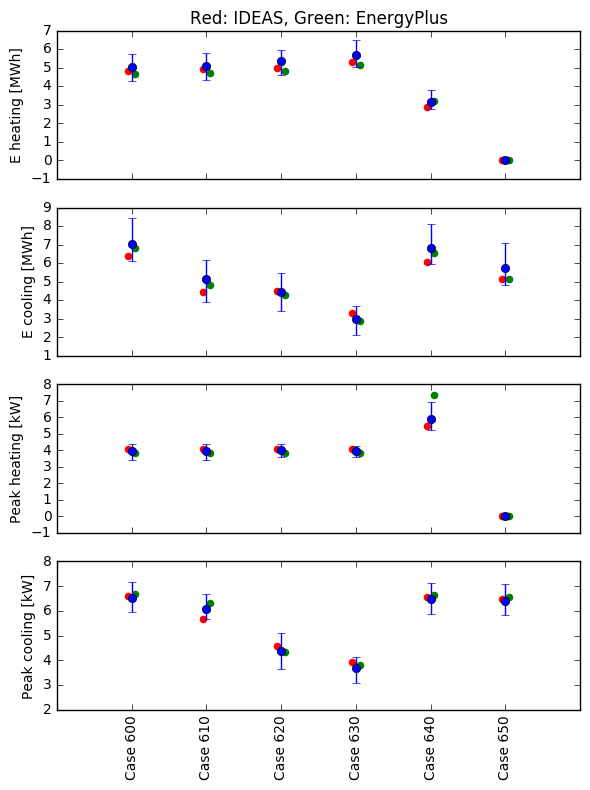

In [43]:

sim = SimResList(os.path.join(RESULTS_DIR, 'dsres.mat'))
fig=plt.figure(figsize=(6,8))



legendsize=10
N=6

gs = gridspec.GridSpec(4,1,height_ratios=[1,1,1,1])

ax0 = plt.subplot(gs[0])
plt.setp(ax0.get_xticklabels(), visible=False)
plot_results(ax0, EHeacase600_Avg, EHeacase600_Min, EHeacase600_Max, EHeacase600_E_plus, [sim["EAnnHea600[" + str(i+1) + "]"].values()[0][-1] for i in range(N)], N)
plt.ylabel('E heating [MWh]')
plt.title('Red: IDEAS, Green: EnergyPlus')
# ax0.errorbar(range(N), EHeacase600_Avg[0:N], yerr=[[EHeacase600_Avg[i]-EHeacase600_Min[i] for i in range(N)], [EHeacase600_Max[i]-EHeacase600_Avg[i] for i in range(N)]], fmt='o')
# ax0.scatter(range(N), [sim["EAnnHea600[" + str(i+1) + "]"].values()[0][-1] for i in range(N)], color='r', marker= 'o')
# ax0.scatter(range(N), EHeacase600_E_plus[0:N], color='g', marker= 'o')

ax0 = plt.subplot(gs[1])
plt.setp(ax0.get_xticklabels(), visible=False)
plt.ylabel('E cooling [MWh]')
plot_results(ax0, ECoocase600_Avg, ECoocase600_Min, ECoocase600_Max, ECoocase600_E_plus, [sim["EAnnCoo600[" + str(i+1) + "]"].values()[0][-1] for i in range(N)], N)


ax0 = plt.subplot(gs[2])
plt.setp(ax0.get_xticklabels(), visible=False)
plt.ylabel('Peak heating [kW]')
plot_results(ax0, PHeacase600_Avg, PHeacase600_Min, PHeacase600_Max, PHeacase600_E_plus, [sim["QPeaHea600[" + str(i+1) + "]"].values()[0][-1] for i in range(N)], N)


ax0 = plt.subplot(gs[3])
plt.ylabel('Peak cooling [kW]')
plot_results(ax0, PCoocase600_Avg, PCoocase600_Min, PCoocase600_Max, PCoocase600_E_plus, [sim["QPeaCoo600[" + str(i+1) + "]"].values()[0][-1] for i in range(N)], N)
plt.xticks(range(N), ['Case 600', 'Case 610', 'Case 620', 'Case 630', 'Case 640', 'Case 650'], rotation='vertical')

plt.tight_layout()

plt.savefig(FIGPATH + "case600.pdf")
plt.savefig(FIGPATH + "case600.png")

plt.show()



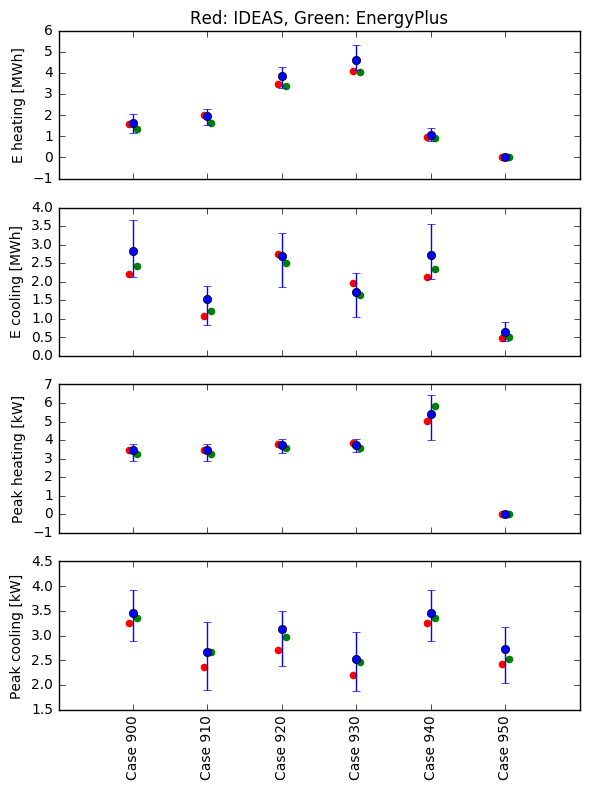

In [44]:
sim = SimResList(os.path.join(RESULTS_DIR, 'dsres.mat'))
fig=plt.figure(figsize=(6,8))



legendsize=10
N=6

gs = gridspec.GridSpec(4,1,height_ratios=[1,1,1,1])

ax0 = plt.subplot(gs[0])
plt.setp(ax0.get_xticklabels(), visible=False)
plot_results(ax0, EHeacase900_Avg, EHeacase900_Min, EHeacase900_Max, EHeacase900_E_plus, [sim["EAnnHea900[" + str(i+1) + "]"].values()[0][-1] for i in range(N)], N)
plt.ylabel('E heating [MWh]')
plt.title('Red: IDEAS, Green: EnergyPlus')
# ax0.errorbar(range(N), EHeacase600_Avg[0:N], yerr=[[EHeacase600_Avg[i]-EHeacase600_Min[i] for i in range(N)], [EHeacase600_Max[i]-EHeacase600_Avg[i] for i in range(N)]], fmt='o')
# ax0.scatter(range(N), [sim["EAnnHea600[" + str(i+1) + "]"].values()[0][-1] for i in range(N)], color='r', marker= 'o')
# ax0.scatter(range(N), EHeacase600_E_plus[0:N], color='g', marker= 'o')

ax0 = plt.subplot(gs[1])
plt.setp(ax0.get_xticklabels(), visible=False)
plt.ylabel('E cooling [MWh]')
plot_results(ax0, ECoocase900_Avg, ECoocase900_Min, ECoocase900_Max, ECoocase900_E_plus, [sim["EAnnCoo900[" + str(i+1) + "]"].values()[0][-1] for i in range(N)], N)


ax0 = plt.subplot(gs[2])
plt.setp(ax0.get_xticklabels(), visible=False)
plt.ylabel('Peak heating [kW]')
plot_results(ax0, PHeacase900_Avg, PHeacase900_Min, PHeacase900_Max, PHeacase900_E_plus, [sim["QPeaHea900[" + str(i+1) + "]"].values()[0][-1] for i in range(N)], N)


ax0 = plt.subplot(gs[3])
plt.ylabel('Peak cooling [kW]')
plot_results(ax0, PCoocase900_Avg, PCoocase900_Min, PCoocase900_Max, PCoocase900_E_plus, [sim["QPeaCoo900[" + str(i+1) + "]"].values()[0][-1] for i in range(N)], N)
plt.xticks(range(N), ['Case 900', 'Case 910', 'Case 920', 'Case 930', 'Case 940', 'Case 950'], rotation='vertical')

plt.tight_layout()

plt.savefig(FIGPATH + "case900.pdf")
plt.savefig(FIGPATH + "case900.png")

plt.show()

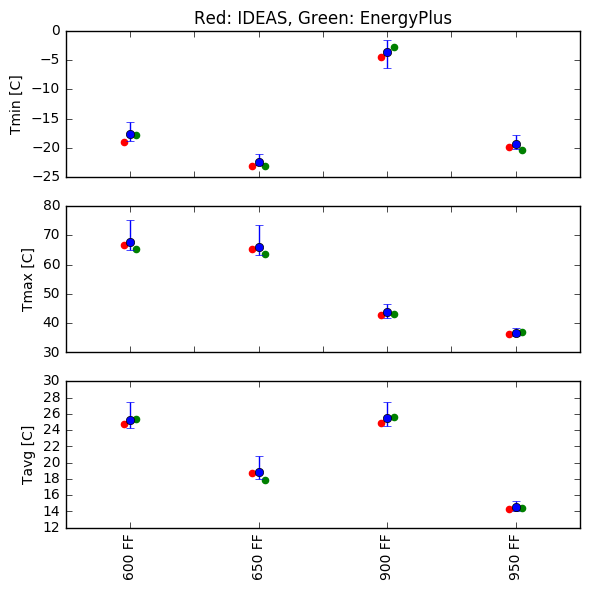

In [45]:
sim = SimResList(os.path.join(RESULTS_DIR, 'dsres.mat'))
fig=plt.figure(figsize=(6,6))



legendsize=10
N=4

gs = gridspec.GridSpec(3,1,height_ratios=[1,1,1])

ax0 = plt.subplot(gs[0])
plt.setp(ax0.get_xticklabels(), visible=False)
plot_results(ax0,  TMin_avg, TMin_min, TMin_max, TMin_E_plus, [sim["Tmin[" + str(i+1) + "]"].values()[0][-1] for i in range(N)], N)
plt.ylabel('Tmin [C]')
plt.title('Red: IDEAS, Green: EnergyPlus')
# ax0.errorbar(range(N), EHeacase600_Avg[0:N], yerr=[[EHeacase600_Avg[i]-EHeacase600_Min[i] for i in range(N)], [EHeacase600_Max[i]-EHeacase600_Avg[i] for i in range(N)]], fmt='o')
# ax0.scatter(range(N), [sim["EAnnHea600[" + str(i+1) + "]"].values()[0][-1] for i in range(N)], color='r', marker= 'o')
# ax0.scatter(range(N), EHeacase600_E_plus[0:N], color='g', marker= 'o')

ax0 = plt.subplot(gs[1])
plt.setp(ax0.get_xticklabels(), visible=False)
plt.ylabel('Tmax [C]')
plot_results(ax0, TMax_avg, TMax_min, TMax_max, TMax_E_plus, [sim["Tmax[" + str(i+1) + "]"].values()[0][-1] for i in range(N)], N)


ax0 = plt.subplot(gs[2])
plt.ylabel('Tavg [C]')
plot_results(ax0, TAvg_avg, TAvg_min, TAvg_max, TAvg_E_plus, [sim["TAnnAvg[" + str(i+1) + "]"].values()[0][-1] for i in range(N)], N)
plt.xticks(range(N), ['600 FF', '650 FF', '900 FF', '950 FF'], rotation='vertical')


plt.tight_layout()

plt.savefig(FIGPATH + "T_FF.pdf")
plt.savefig(FIGPATH + "T_FF.png")

plt.show()

In [97]:
strings = ['600', '610', '620', '630', '640', '650']

for i in range(len(strings)):
    if not i == 5:
        print strings[i] + "," + str(sim["EAnnHea600[" + str(i+1) + "]"].values()[0][-1]/EHeacase600_Avg[i]) + ",Qh,-1.5"
    print strings[i] + "," + str(sim["EAnnCoo600[" + str(i+1) + "]"].values()[0][-1]/ECoocase600_Avg[i]) + ",Qc,-0.5"
    if not i == 5:
        print strings[i] + "," + str(sim["QPeaHea600[" + str(i+1) + "]"].values()[0][-1]/PHeacase600_Avg[i]) + ",Ph,0.5"
    print strings[i] + "," + str(sim["QPeaCoo600[" + str(i+1) + "]"].values()[0][-1]/PCoocase600_Avg[i]) + ",Pc,1.5"
    
strings = ['900', '910', '920', '930', '940', '950']
for i in range(len(strings)):
    if not i == 5:
        print strings[i] + "," + str(sim["EAnnHea900[" + str(i+1) + "]"].values()[0][-1]/EHeacase900_Avg[i]) + ",Qh,-1.5"
    print strings[i] + "," + str(sim["EAnnCoo900[" + str(i+1) + "]"].values()[0][-1]/ECoocase900_Avg[i]) + ",Qc,-0.5"
    if not i == 5:
        print strings[i] + "," + str(sim["QPeaHea900[" + str(i+1) + "]"].values()[0][-1]/PHeacase900_Avg[i]) + ",Ph,0.5"
    print strings[i] + "," + str(sim["QPeaCoo900[" + str(i+1) + "]"].values()[0][-1]/PCoocase900_Avg[i]) + ",Pc,1.5"
        

600,0.967000809351,Qh,-1.5
600,0.879947097694,Qc,-0.5
600,1.04389463359,Ph,0.5
600,0.987413372807,Pc,1.5
610,0.971583800819,Qh,-1.5
610,0.838189807316,Qc,-0.5
610,1.04554888868,Ph,0.5
610,0.90089924817,Pc,1.5
620,0.948972709186,Qh,-1.5
620,0.996509755867,Qc,-0.5
620,1.03415531657,Ph,0.5
620,1.03160837314,Pc,1.5
630,0.960617052012,Qh,-1.5
630,1.08388657087,Qc,-0.5
630,1.04719598132,Ph,0.5
630,1.052589582,Pc,1.5
640,0.93036610544,Qh,-1.5
640,0.864761181187,Qc,-0.5
640,0.941949437558,Ph,0.5
640,0.9882181432,Pc,1.5
650,0.874942470115,Qc,-0.5
650,0.985934762639,Pc,1.5
900,1.01005720181,Qh,-1.5
900,0.736948537725,Qc,-0.5
900,1.02058664258,Ph,0.5
900,0.89956425518,Pc,1.5
910,1.0557823582,Qh,-1.5
910,0.660450892727,Qc,-0.5
910,1.02641086904,Ph,0.5
910,0.843087564848,Pc,1.5
920,0.927469137445,Qh,-1.5
920,1.00202611946,Qc,-0.5
920,1.03147199538,Ph,0.5
920,0.863816697667,Pc,1.5
930,0.933750334082,Qh,-1.5
930,1.11956436502,Qc,-0.5
930,1.0418131241,Ph,0.5
930,0.874776266344,Pc,1.5
940,0.94554536250